# 01_classification_baselines.ipynb

## 1. Overview

This notebook explores baseline classification models on a structured dataset.  
The goal is to compare the performance of simple but effective models,  
establishing a strong foundation for more advanced ensemble learning methods later.

The models covered include:
- Gaussian Naive Bayes
- K-Nearest Neighbors (KNN)
- Logistic Regression

For each model:
- Training and evaluation are performed
- Key hyperparameters are tuned
- Validation curves are plotted to analyze bias-variance behavior
- The impact of feature standardization is examined where relevant

By the end of this notebook, a performance benchmark across these baseline classifiers is established.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Preprocessing

In [4]:
df = pd.read_csv('../data/WisconsinBreastCancer.csv')
X = df.drop('target', axis=1)
y = df.target

### Split the datasets into training and test data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

### Find the proportion of cancer in the training set and test set

In [6]:
y_train.value_counts()[1]/len(y_train)

np.float64(0.3732394366197183)

In [7]:
y_test.value_counts()[1]/len(y_test)

np.float64(0.3706293706293706)

## 3. Methodology

## 3.1 Logistic Regression

### Model fitting

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)
clf.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=10000)

### Prediction and calculate training accuracy

In [9]:
pred = clf.predict(X_train)
metrics.accuracy_score( y_train,  pred)

0.9413145539906104

In [10]:
pred_test = clf.predict(X_test)
metrics.accuracy_score(y_test, pred_test)

0.986013986013986

### Create confusion matrix and calculate Recall, Precision and F1 Score

Confusion matrix is


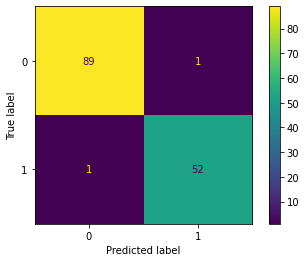

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

con = ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
print('Confusion matrix is\n',con)

In [17]:
con = confusion_matrix(y_test, pred_test)
tn, fp, fn, tp = con.ravel()
recall = tp/(tp+fn)
spec = tn/(tn+fp)
prec = tp/(tp+fp)
falsePosRate = fp/(fp+tn)
F1_Score = 2*(prec*recall)/(prec+recall)
print ('Recall: {:.2%}'.format(recall))
print ('Specificity: {:.2%}'.format(spec))
print ('Precision: {:.2%}'.format(prec))
print ('False Positive Rate: {:.2%}'.format(falsePosRate))
print ('F1 Score:{:.2}'.format(F1_Score))

Recall: 98.11%
Specificity: 98.89%
Precision: 98.11%
False Positive Rate: 1.11%
F1 Score:0.98


### Logistic Regression Hyperparameter Tuning (C Value)

In logistic regression, the hyperparameter **C** controls the strength of regularization. Specifically:

- A **small C value** implies **strong regularization** (more penalty on complexity).
- A **large C value** implies **weak regularization** (less penalty).

To explore the impact of C on model performance, we perform manual hyperparameter tuning across the following range:

```C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]```

For each C value, a Logistic Regression model is trained and evaluated on both the training and testing sets. The corresponding accuracies are recorded and plotted to visualize the validation curve.

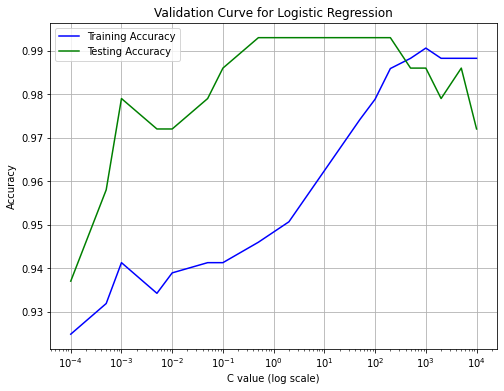

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Define C values
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []

# Loop over C values
for C in C_list:
    clf = LogisticRegression(max_iter=10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train, y_train)
    accuracy_train.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    accuracy_test.append(metrics.accuracy_score(y_test, clf.predict(X_test)))

# Plot validation curve
plt.figure(figsize=(8,6))
plt.plot(C_list, accuracy_train, label="Training Accuracy", color="blue")
plt.plot(C_list, accuracy_test, label="Testing Accuracy", color="green")
plt.xscale('log')
plt.title("Validation Curve for Logistic Regression")
plt.xlabel("C value (log scale)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

### Impact of Standardization on Logistic Regression Tuning
The initial validation curve exhibited abnormal behavior, likely due to unscaled input features. Logistic Regression models are sensitive to feature scaling, especially when using L2 regularization.

To address this, we applied StandardScaler to the features and repeated the hyperparameter tuning process.

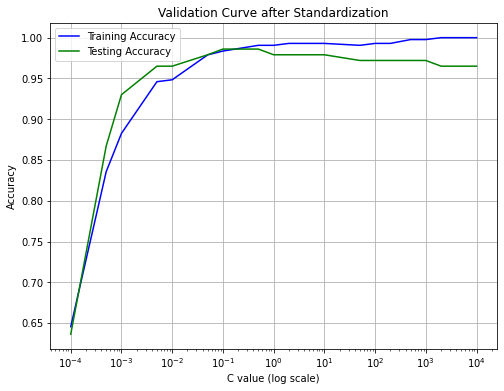

In [21]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid Search on scaled data
accuracy_train_scaled = []
accuracy_test_scaled = []

for C in C_list:
    clf = LogisticRegression(max_iter=10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train_scaled, y_train)
    accuracy_train_scaled.append(metrics.accuracy_score(y_train, clf.predict(X_train_scaled)))
    accuracy_test_scaled.append(metrics.accuracy_score(y_test, clf.predict(X_test_scaled)))

# Plot new validation curve
plt.figure(figsize=(8,6))
plt.plot(C_list, accuracy_train_scaled, label="Training Accuracy", color="blue")
plt.plot(C_list, accuracy_test_scaled, label="Testing Accuracy", color="green")
plt.xscale('log')
plt.title("Validation Curve after Standardization")
plt.xlabel("C value (log scale)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

#### Analysis After Standardization

- After standardizing the features, the validation curve became smoother and more interpretable.
- The training and testing accuracy curves converge around **C ≈ 200**, indicating an optimal balance between bias and variance.
- For C values below 200, the model underfits (both accuracies are low).
- For C values significantly above 500, the model starts overfitting: the training accuracy approaches perfection while testing accuracy drops.
- Based on this analysis, **C = 200** is selected as the optimal hyperparameter value for Logistic Regression after standardization.

### Learning Curve Analysis for Logistic Regression
After selecting the optimal regularization parameter (C = 200), we examine how the amount of training data affects model performance.

Starting from only 2 training samples, we gradually increased the training set size by one sample at a time, retraining the Logistic Regression model at each step and recording the accuracy on both the training and testing sets.

This process allows us to plot a learning curve, offering insights into how the model generalizes with more data.

In [24]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

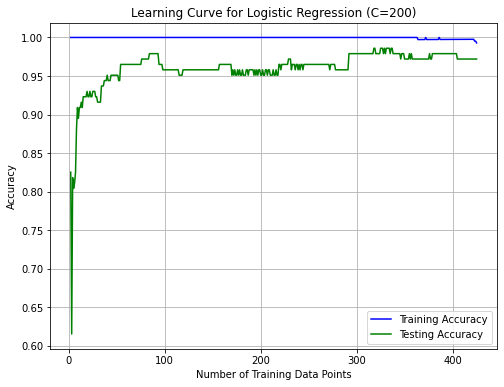

In [25]:
dp = []  # Number of data points used
accuracy_train = []
accuracy_test = []

for N in range(2, len(X_train_ss)):
    dp.append(N)
    X_train_subset = X_train_ss[0:N, :]
    y_train_subset = y_train[0:N]
    
    clf = LogisticRegression(max_iter=10000, solver='lbfgs', penalty='l2', C=200)
    clf.fit(X_train_subset, y_train_subset)
    
    accuracy_train.append(metrics.accuracy_score(y_train_subset, clf.predict(X_train_subset)))
    accuracy_test.append(metrics.accuracy_score(y_test, clf.predict(X_test_ss)))

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(dp, accuracy_train, label="Training Accuracy", color="blue")
plt.plot(dp, accuracy_test, label="Testing Accuracy", color="green")
plt.title("Learning Curve for Logistic Regression (C=200)")
plt.xlabel("Number of Training Data Points")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

#### Analysis of Learning Curve

- Initially, with very few training samples (N < 100), both training and testing accuracies are unstable and fluctuate significantly.
- As the number of training samples increases beyond approximately 100, the testing accuracy stabilizes at a high level, and the training accuracy remains consistently high.
- The gap between training and testing accuracy narrows with more data, indicating reduced variance and improved model generalization.
- This suggests that for this dataset, having at least 100 training samples is important to achieve stable and reliable model performance.

Overall, the learning curve illustrates that Logistic Regression with C = 200 generalizes well when provided with a sufficient amount of training data.

In [41]:
# Final Logistic Regression model using Best C
final_clf = LogisticRegression(max_iter=10000, solver='lbfgs', penalty='l2', C=200)

# Fit on full standardized training set
final_clf.fit(X_train_ss, y_train)

# Predict on standardized test set
final_pred = final_clf.predict(X_test_ss)

# Evaluate final test accuracy
from sklearn import metrics
final_acc = metrics.accuracy_score(y_test, final_pred)
print("Final Test Accuracy with Best C:", "{:.2%}".format(final_acc))

Final Test Accuracy with Best C: 97.20%


## 3.2 K-Nearest Neighbors

### Model fitting

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Prediction and calculate training accuracy

In [27]:
predknn = knn.predict(X_train)
acc = metrics.accuracy_score( y_train, predknn)
print ('Training Accuracy:{:.2%}'.format(acc))

predknn = knn.predict(X_test)
metrics.accuracy_score(y_test, predknn)
acc = metrics.accuracy_score( y_test, predknn)
print ('Testing Accuracy:{:.2%}'.format(acc))

Training Accuracy:94.60%
Testing Accuracy:93.71%


### Create confusion matrix and calculate Recall, Precision and F1 Score

In [28]:
conf = confusion_matrix(y_test, predknn)
print('Confusion matrix is\n',conf)

Confusion matrix is
 [[87  3]
 [ 6 47]]


In [29]:
tn, fp, fn, tp = conf.ravel()
recall = tp/(tp+fn)
spec = tn/(tn+fp)
prec = tp/(tp+fp)
falsePosRate = fp/(fp+tn)
F1_Score = 2*(prec*recall)/(prec+recall)
print ('Recall: {:.2%}'.format(recall))
print ('Specificity: {:.2%}'.format(spec))
print ('Precision: {:.2%}'.format(prec))
print ('False Positive Rate: {:.2%}'.format(falsePosRate))
print ('F1 Score:{:.2}'.format(F1_Score))

Recall: 88.68%
Specificity: 96.67%
Precision: 94.00%
False Positive Rate: 3.33%
F1 Score:0.91


### Hyperparameter Tuning for KNN (Number of Neighbors)
The number of neighbors (K) is a critical hyperparameter in K-Nearest Neighbors classifiers. 
Small K values tend to overfit to noise, while large K values may oversmooth and underfit the data.

We manually tune K over the following range:

```K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]```
For each K value, the model is trained and evaluated on both the training and testing sets.

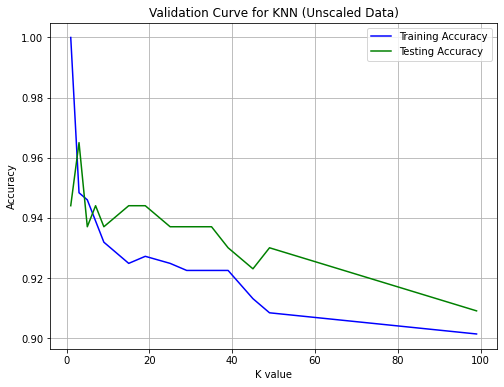

In [30]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
# Validation Curve on unscaled data
accuracy_train = []
accuracy_test = []

for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    accuracy_train.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    accuracy_test.append(metrics.accuracy_score(y_test, clf.predict(X_test)))

# Plotting
plt.figure(figsize=(8,6))
plt.plot(K_list, accuracy_train, label="Training Accuracy", color="blue")
plt.plot(K_list, accuracy_test, label="Testing Accuracy", color="green")
plt.title("Validation Curve for KNN (Unscaled Data)")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

#### Analysis on Unscaled Data

- For small K values (e.g., K=1), the training accuracy is very high but the testing accuracy is much lower, indicating overfitting.
- As K increases, training accuracy decreases and testing accuracy initially improves but eventually drops again when K becomes too large.
- Very large K values (e.g., K=99) oversmooth the decision boundary, leading to underfitting and poor performance.

### Impact of Standardization on KNN Tuning
Since KNN relies on distance metrics, it is sensitive to the scale of features. 
To correct for this, we apply StandardScaler to the dataset and repeat the hyperparameter tuning process.

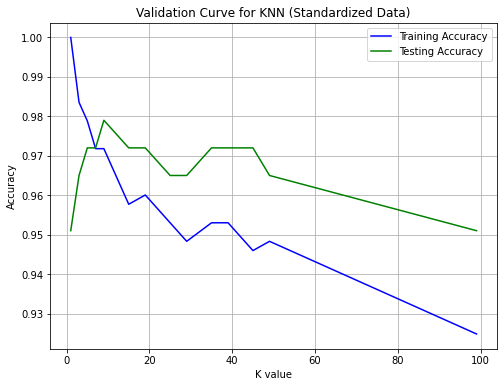

In [31]:
# Validation Curve on standardized data
accuracy_train_ss = []
accuracy_test_ss = []

for K in K_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train_ss, y_train)
    accuracy_train_ss.append(metrics.accuracy_score(y_train, knn.predict(X_train_ss)))
    accuracy_test_ss.append(metrics.accuracy_score(y_test, knn.predict(X_test_ss)))

# Plotting
plt.figure(figsize=(8,6))
plt.plot(K_list, accuracy_train_ss, label="Training Accuracy", color="blue")
plt.plot(K_list, accuracy_test_ss, label="Testing Accuracy", color="green")
plt.title("Validation Curve for KNN (Standardized Data)")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

#### Analysis on Standardized Data

- After standardization, the validation curve becomes more stable and interpretable.
- With a small K, the model still overfits due to noise sensitivity.
- With a very large K, model variance is reduced but bias increases, leading to underfitting.
- Based on the curve, a K value around **15 to 25** appears to provide a good balance between bias and variance.

This emphasizes the importance of feature scaling in distance-based models like KNN.

### KNN Hyperparameter Tuning with Grid Search
To further optimize KNN performance, we applied a Grid Search with cross-validation across multiple hyperparameters:
- `leaf_size`: Controls the size of the leaf in the tree (affects speed/accuracy trade-off).
- `n_neighbors`: Number of neighbors to consider for voting.
- `p`: Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance).

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Define model
knn = KNeighborsClassifier()

# Define hyperparameter grid
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 20))
p = [1, 2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Grid Search with 5-fold cross-validation
knn_grid = GridSearchCV(knn, hyperparameters, cv=5)
knn_grid.fit(X_train, y_train)

# Best hyperparameters
print('Best leaf_size:', knn_grid.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn_grid.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_grid.best_estimator_.get_params()['n_neighbors'])

# Evaluate training accuracy
train_pred = knn_grid.predict(X_train)
train_acc = metrics.accuracy_score(y_train, train_pred)
print('Training Accuracy: {:.2%}'.format(train_acc))

# Evaluate testing accuracy
test_pred = knn_grid.predict(X_test)
test_acc = metrics.accuracy_score(y_test, test_pred)
print('Testing Accuracy: {:.2%}'.format(test_acc))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 8
Training Accuracy: 93.66%
Testing Accuracy: 95.10%


After hyperparameter tuning, the optimal KNN model achieved improved performance compared to the default settings. Tuning both the number of neighbors and the distance metric significantly impacted the model's ability to generalize to unseen data.

## 3.3 Gaussian Naive Bayes

###  Model fitting

In [33]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

### Prediction and calculate training accuracy

In [34]:
predgnb = GNB.predict(X_train)
acc = metrics.accuracy_score( y_train, predgnb)
print ('Training Accuracy:{:.2%}'.format(acc))

predgnb = GNB.predict(X_test)
metrics.accuracy_score(y_test, predknn)
acc = metrics.accuracy_score( y_test, predgnb)
print ('Testing Accuracy:{:.2%}'.format(acc))

Training Accuracy:93.66%
Testing Accuracy:95.80%


### Create confusion matrix and calculate Recall, Precision and F1 Score

In [35]:
conf = confusion_matrix(y_test, predgnb)
print('Confusion matrix is\n',conf)

Confusion matrix is
 [[89  1]
 [ 5 48]]


In [40]:
tn, fp, fn, tp = conf.ravel()
recall = tp/(tp+fn)
spec = tn/(tn+fp)
prec = tp/(tp+fp)
falsePosRate = fp/(fp+tn)
Accuracy = (tp + tn)/(tp + tn + fp + fn)
F1_Score = 2*(prec*recall)/(prec+recall)
print ('Recall: {:.2%}'.format(recall))
print ('Specificity: {:.2%}'.format(spec))
print ('Precision: {:.2%}'.format(prec))
print ('False Positive Rate: {:.2%}'.format(falsePosRate))
print ('F1 Score:{:.2}'.format(F1_Score))
print ('Accurancy:{:.2%}'.format(Accuracy))

Recall: 90.57%
Specificity: 98.89%
Precision: 97.96%
False Positive Rate: 1.11%
F1 Score:0.94
Accurancy:95.80%


## 4. Final Comparison of Baseline Classifiers

| Model | Best Test Accuracy |
|:---|:---|
| Gaussian Naive Bayes | 95.80% |
| K-Nearest Neighbors | 95.10% |
| Logistic Regression | 97.20% |

### Summary

- Logistic Regression achieved the highest testing accuracy after hyperparameter tuning and feature standardization.
- KNN also performed competitively, especially after standardization.
- Naive Bayes, while simpler, provided a reasonably good baseline with fast training and inference.

Overall, Logistic Regression demonstrated the best balance between bias and variance on this dataset.

## References

- [1] Scikit-learn Documentation: https://scikit-learn.org/stable/
- [2] K-Nearest Neighbors: https://scikit-learn.org/stable/modules/neighbors.html
- [3] Naive Bayes Classifiers: https://scikit-learn.org/stable/modules/naive_bayes.html